In [1]:
#Required libraires for the project
import os
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import re
text_list=[]
label_list=[]
df = pd.DataFrame(columns=['Text','Label'])
count=0
spam_count=0
non_spam_count=0
for root, dirs, files in os.walk("/Users/prashanthimallijula/Documents/EECS738/project3/lingspam_public/lemm_stop/"):
        #print(root)
        for  root, dirs, files in os.walk(root):
            for file in files:
                #if (count > 0):
                    f = open(root+"/"+file, "r",encoding='latin-1', errors='ignore')
                    text= f.read()
                    if (file[0:4]=="spms"):
                        lable= "spam"
                        spam_count=spam_count+1
                    else:
                        lable= "not_spam"
                        non_spam_count=non_spam_count+1
                    f.close()
                    text_list.append(text[8:])
                    label_list.append(lable)

            #count=count+1
df['Text']=text_list
df['Label']=label_list

In [2]:
df['Text'] = [entry.lower() for entry in df['Text']]

In [3]:
ind_list=[]
ind_count=0
for i in df['Text']:
    ind_count=ind_count+1
    ind_list.append(ind_count)
df['Ind']= ind_list

In [4]:
df.head()

,Text,Label,Ind
0,                                          ...,not_spam,1
1,job post - apple-iss research center\n\nconte...,not_spam,2
2,"\n\nlang classification grime , joseph e . ba...",not_spam,3
3,query : letter frequency text identification\...,not_spam,4
4,risk\n\ncolleague research differ degree risk...,not_spam,5


In [5]:
df.set_index('Ind', inplace=True)

In [6]:
spam_count=0
non_spam_count=0
for i in df['Label']:
    if (i== str('not_spam')):
        non_spam_count=non_spam_count+1
    if (i== str('spam')):
        spam_count= spam_count+1
        
print('non_spam_count', non_spam_count)
print('spam_count',spam_count)

non_spam_count 4825
spam_count 962


In [7]:
df.shape

(5787, 2)

In [8]:
df['Label'].unique()

array(['not_spam', 'spam'], dtype=object)

In [9]:
df.describe(exclude=[np.number])

,Text,Label
count,5787,5787
unique,2875,2
top,re :\n\n= 20 virtual girlfriend virtual boyfr...,not_spam
freq,8,4825


In [19]:
from nltk import word_tokenize
df['Text'].dropna(inplace=True)
df['tokenized_text'] =df['Text'].apply(word_tokenize)

In [20]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#Remove speacial characters
#Check stop words and special characters
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#special=['!','@','#','$','%','^','&','*','(',')',':','<','>',',','.',';','{','}','|','_','-','+','=','`','~',"--","'",'"','[',']','\n','/','\\']
special=[',','.',';','_','-','=','*']
for item  in df['tokenized_text']:
    item_new=[]
    for word in item:
        word=str(word)
        if (word in stop_words) or (word in special):
            item.remove(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prashanthimallijula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df.head()

,Text,Label,tokenized_text
Ind,,,
1,                                          ...,not_spam,"[  ,       ,    ,                          ..."
2,job post - apple-iss research center\n\nconte...,not_spam,"[job, post, apple-iss, research, center, conte..."
3,"\n\nlang classification grime , joseph e . ba...",not_spam,"[lang, classification, grime, joseph, e, barba..."
4,query : letter frequency text identification\...,not_spam,"[query, :, letter, frequency, text, identifica..."
5,risk\n\ncolleague research differ degree risk...,not_spam,"[risk, colleague, research, differ, degree, ri..."


In [24]:
#Get uniques words in the data that is unique words in our case
unique_words=[]
temp_list=[]
#for item in df['tokenized_text']:
#    if 
#    for word in item:
#        temp_list.append(word)
#temp_list1 = temp_list
#temp_list =set(temp_list)
for i in range(len(df.Label)):
    if i>=1:
        if(df.Label[i] == 'spam'):
            for word in df.Text[i]:
                temp_list.append(word)
temp_list =set(temp_list)
unique_words=temp_list

In [26]:
word_occurance={}
for word in temp_list:
        if word in word_occurance:
            word_occurance[word] += 1
        else:
            word_occurance[word] = 1

In [27]:
new_word_occurance={}
for k,v in word_occurance.items():
        if v>=4:
             new_word_occurance[k]=v

In [28]:
is_spam = df['Label']=='spam'
spam_df=df[is_spam]
spam_df.head()

,Text,Label,tokenized_text
Ind,,,
23,free\n\nmulti-part message mime format . - - ...,spam,"[free, multi-part, message, mime, format, next..."
40,internet success toolbox\n\nnote : wish send ...,spam,"[internet, success, toolbox, note, :, wish, se..."
86,free stealth 3 . 0 bulk email software . . .\...,spam,"[free, stealth, 3, 0, bulk, email, software, r..."
87,"need money ?\n\nhi , earn extra $ 700 week . ...",spam,"[need, money, ?, hi, earn, extra, $, 700, week..."
88,cable decsrambler $ 6 . 99 !\n\nreally cool !...,spam,"[cable, decsrambler, $, 6, 99, !, really, cool..."


In [29]:
is_not_spam = df['Label']=='not_spam'
not_spam_df=df[is_not_spam]
not_spam_df.head()

,Text,Label,tokenized_text
Ind,,,
1,                                          ...,not_spam,"[  ,       ,    ,                          ..."
2,job post - apple-iss research center\n\nconte...,not_spam,"[job, post, apple-iss, research, center, conte..."
3,"\n\nlang classification grime , joseph e . ba...",not_spam,"[lang, classification, grime, joseph, e, barba..."
4,query : letter frequency text identification\...,not_spam,"[query, :, letter, frequency, text, identifica..."
5,risk\n\ncolleague research differ degree risk...,not_spam,"[risk, colleague, research, differ, degree, ri..."


In [30]:
word_and_spam={}
temp_list2=[]
for item in spam_df['tokenized_text']:
    for word in item:
        temp_list2.append(word)

for word in temp_list2:
        if word in word_and_spam:
            word_and_spam[word] += 1
        else:
            word_and_spam[word] = 1
            
new_word_and_spam={}
for k,v in  word_and_spam.items():
        if v>=4:
              new_word_and_spam[k]=v

In [31]:
word_and_non_spam={}
temp_list3=[]
for item in not_spam_df['tokenized_text']:
    for word in item:
        temp_list3.append(word)

for word in temp_list3:
        if word in word_and_non_spam:
            word_and_non_spam[word] += 1
        else:
            word_and_non_spam[word] = 1
            
new_word_and_non_spam={}
for k,v in  word_and_non_spam.items():
        if v>=4:
              new_word_and_non_spam[k]=v

In [32]:
print('non_spam_count', non_spam_count)
print('spam_count',spam_count)

non_spam_count 4825
spam_count 962


In [33]:
df['Label'] = df['Label'].map( {'spam': 1, 'not_spam': 0} ).astype(int)

In [34]:
import math
non_occurance_spam_prob_yes=0.0
non_occurance_spam_prob_no=0.0
occurance_spam_prob_yes=0.0
occurance_spam_prob_no=0.0
IG={}
for k,v in new_word_occurance.items():
    #req
    non_occurance_prob= ((len(new_word_occurance)-v)/len(new_word_occurance))
    if (k in word_and_spam):
        non_occurance_spam_yes= (len(word_and_spam)-word_and_spam[k])/(len(word_and_spam))
        #req
        non_occurance_spam_yes = abs(non_occurance_spam_yes)
        non_occurance_spam_prob_yes=math.log2(non_occurance_spam_yes)   
    if (k in word_and_non_spam):
        non_occurance_spam_no= (len(word_and_non_spam)-word_and_non_spam[k])/(len(word_and_spam))
        #req
        non_occurance_spam_no = abs(non_occurance_spam_no)
        non_occurance_spam_prob_no= math.log2(non_occurance_spam_no)
        #req
    occurance_prob= (v/len(new_word_occurance))
    if (k in word_and_spam):
        occurance_spam_yes= (word_and_spam[k]/spam_count)
        #req
        occurance_spam_yes=abs(occurance_spam_yes)
        occurance_spam_prob_yes= math.log2(occurance_spam_yes)
    if (k in word_and_non_spam):
        occurance_spam_no=(word_and_non_spam[k]/len(word_and_non_spam))
        #req
        occurance_spam_no=abs(occurance_spam_no)
        occurance_spam_prob_no=math.log2(occurance_spam_no)
   
    IG[k] = ((non_occurance_prob*(non_occurance_spam_prob_yes+non_occurance_spam_prob_no))
                 +(occurance_prob*(occurance_spam_prob_yes+occurance_spam_prob_no)))

In [35]:
sorted_IG={}
sorted_IG = sorted(IG.items(), key=lambda kv: kv[1])
c=0
for k,v in reversed(sorted_IG):
         print(k,v)
         c=c+1
print('length :',c)

length : 0


In [36]:
c=0
attri_dict={}
for k,v in reversed(sorted_IG):
    if c<=70:
        attri_dict[k]=v
        c=c+1
for k,v in attri_dict.items():
    print(k,v)

In [37]:
att_values=[]
for k, v in attri_dict.items():
    att_values=[]
    for item in df['tokenized_text']:
        if k in item:
            att_values.append(1)
        else:
            att_values.append(0)
    df[k]=att_values

In [38]:
#Overview of training data
print('Number of rows and columns in training data is - {}'.format(df.shape))
print()
print('Data types of training data is - {}'.format(df.dtypes))
print()
print('Training data Description  - {}'.format(df.describe()))
print()
print()
print('Training data Column names  - {}'.format(df.columns))
print()

#determine data type of columns and group  - Numeric/Non-Numeric
numerical = df.describe(include=[np.number])
print('Training data numeric columns are  - {}'.format(numerical))
print()

Number of rows and columns in training data is - (5787, 3)

Data types of training data is - Text              object
Label              int64
tokenized_text    object
dtype: object

Training data Description  -              Label
count  5787.000000
mean      0.166235
std       0.372323
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


Training data Column names  - Index(['Text', 'Label', 'tokenized_text'], dtype='object')

Training data numeric columns are  -              Label
count  5787.000000
mean      0.166235
std       0.372323
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000



In [39]:
df.head()

,Text,Label,tokenized_text
Ind,,,
1,                                          ...,0,"[  ,       ,    ,                          ..."
2,job post - apple-iss research center\n\nconte...,0,"[job, post, apple-iss, research, center, conte..."
3,"\n\nlang classification grime , joseph e . ba...",0,"[lang, classification, grime, joseph, e, barba..."
4,query : letter frequency text identification\...,0,"[query, :, letter, frequency, text, identifica..."
5,risk\n\ncolleague research differ degree risk...,0,"[risk, colleague, research, differ, degree, ri..."


In [40]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(6)
import math

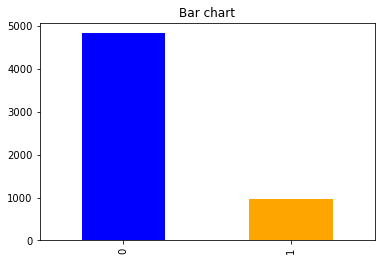

In [41]:
count_Class=pd.value_counts(df['Label'], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [42]:
#df['Label'] = df['Label'].map( {'spam': 1, 'not_spam': -1} ).astype(int)

In [43]:
#df['Label1'] = df['Label'].map( {1: 1, -1: 0} ).astype(int)
l= df['Label'].tolist()
Y = np.array(l)

In [44]:
X =df[df.columns[3:]]
X=np.array(X)
X.shape

(5787, 0)

In [45]:
np.sum(Y)

962

In [46]:
X[100]

array([], dtype=float64)

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers

In [48]:
def linear_kernel(x, y):
    x = np.array(x)
    y = np.array(y)
    return np.dot(x, y)
def poly_kernel(x, y, d = 4):
    x = np.array(x)
    y = np.array(y)
    return (np.dot(x, y) + 1) ** d

def rbf_kernel(x, y, sigma = 1):
    x = np.array(x)
    y = np.array(y)
    norm = np.linalg.norm(x - y)
    return np.exp(- (norm ** 2) / (sigma ** 2))

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers
C=None
show_progress = False
Y_predict=[]
pred_col=[]
weight_opt_list=[]
b_list=[]
def compute_dot_product(X,kernel):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
             for j in range(n_samples):
                    if kernel=="linear_kernel":
                            K[i,j] = linear_kernel(X[i,:], X[j,:])
                    if kernel=="poly_kernel":
                            K[i,j] = poly_kernel(X[i,:], X[j,:])
                    if kernel=="rbf_kernel":
                            K[i,j] = rbf_kernel(X[i,:], X[j,:])
        return(K)
def compute_lagrange_multipliers(X,Y,K):
        # Setup solver inputs
        data_size = Y.shape[0]
        P = matrix(K, tc='d') # d means floats
        q = matrix(np.full(Y.shape, -1, dtype=float), tc='d')
        G = matrix(-np.identity(data_size), tc='d') if C is None \
            else matrix(np.concatenate((-np.identity(data_size), np.identity(data_size))), tc='d')
        b = matrix(np.zeros(1), tc='d')
        A = matrix(Y, tc='d').T
        h = matrix(np.zeros(data_size), tc='d') if C is None \
            else matrix(np.concatenate((np.zeros(data_size),C * np.ones(data_size))), tc='d')   
        solvers.options['show_progress'] = show_progress
        solution = solvers.qp(P, q, G, h, A, b)['x'] # Get oprtimal values
        return np.asarray(solution).reshape((data_size,)) # Convert matrix to numpy array
def compute_opt_weights(Lagrange_values,X,Y):
    weight_opt_list=[]
    for i in range(len(Lagrange_values)):
        sample_weight = Lagrange_values[i]*Y[i]*np.sum(X[i,:])
        weight_opt_list.append(sample_weight)
    return(weight_opt_list)
def compute_bias(Lagrange_values,Y):
    b_list=[]
    for i in range(Y.shape[0]):
        sample_b= Lagrange_values[i]*Y[i]
        b_list.append(sample_b)
    return(b_list)
#X:
#[X1...........X1i] [Yi]
#[x1,x2,x3.....xn][y1]
#[x1,x2,x3.....xn][y2]
#[x1,x2,x3.....xn][yn]
def svm_training(X,Y):
    Y_predict=[]    
    Lagrange_values=[]
    weight_opt_list=[]
    b_list=[]
    K= compute_dot_product(X,'poly_kernel')
    Lagrange_values= compute_lagrange_multipliers(X,Y,K)
    #print(len(Lagrange_values))
    weight_opt_list= compute_opt_weights(Lagrange_values,X,Y)
    #print(len(weight_opt_list))
    b_list= compute_bias(Lagrange_values,Y)
    #print(len(b_list))
    return (weight_opt_list,b_list)
#Pediction part
def svm_precit(weight_opt_list,X_Test, b_list):
    weight_opt_list=np.array(weight_opt_list)
    b_list=np.array(b_list)
    for i in range(len(X_Test)):
        pred = (weight_opt_list[i]*np.sum(X[i,:]))+(b_list[i])
        if pred > 0:
            Y_predict.append(1)
            pred_col.append('spam')
        if pred <= 0:
            Y_predict.append(-1)
            pred_col.append('not-spam') 
    return(Y_predict,pred_col)
weight_opt_list,b_list=svm_training(X,Y)
Y_predict,pred_col=svm_precit(weight_opt_list,X, b_list)
df['Y_predict'] =Y_predict
df['pred_col'] =pred_col

In [ ]:
df.head()

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
acc=accuracy_score(df['Label'].values, df['Y_predict'].values, normalize = True)
met=metrics.classification_report(df['Label'].values, df['Y_predict'].values)
conf=metrics.confusion_matrix(df['Label'].values, df['Y_predict'].values)
res=[]
res.append(str(acc))
res.append(str(met))
res.append(str(conf))

In [ ]:
print("Accuracy:")
print(res[0])
print("\n")
print("Classification_report:")
print("\n")
print(res[1])
print("\n")
print("Confusion_Matrix:")
print("\n")
print(res[2])